# Regression Demo - Semaine 1

In [3]:
#Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

*   **numpy et pandas** → manipuler les données.
*   **matplotlib.pyplot** → faire des graphiques.
*   **scikit-learn (sklearn)** → contient les algorithmes et les datasets.
       * LinearRegression, LogisticRegression, Ridge, Lasso = modèles de
régression.
       * load_diabetes, load_iris = datasets intégrés dans sklearn.
       * train_test_split = séparer données en train/test.
       * mean_squared_error, r2_score, accuracy_score = métriques d’évaluation.

# Régression linéaire (exemple avec dataset Diabetes)
La régression linéaire est utilisée pour prédire une valeur continue (prix, salaire, progression d’une maladie…).

In [4]:
# --- Régression linéaire ---
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print("Régression linéaire - R² :", r2_score(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

Régression linéaire - R² : 0.4526027629719195
MSE : 2900.193628493482


Étapes :

1. **Chargement des données**: load_diabetes → prédire la progression du diabète en fonction de caractéristiques médicales.
    * X = variables explicatives (âge, IMC, taux de sucre, etc.).
    * y = variable cible (progression de la maladie).
2. **Découpage Train/Test** : 80% apprentissage, 20% test.
3. **Entraînement du modèle** : lin_reg.fit(X_train, y_train).
4. **Prédictions **: lin_reg.predict(X_test).
5. **Évaluation** :
    * r2_score = proportion de variance expliquée (0 à 1, plus c’est proche de 1, mieux c’est).
    * mean_squared_error = erreur quadratique moyenne (plus petit = mieux).





* R² (coefficient de détermination) : mesure la proportion de variance expliquée par le modèle.
  * Ici : 0.45, donc le modèle explique environ 45% de la variance.
* MSE (Mean Squared Error) : erreur quadratique moyenne.
  * Ici : ≈ 2900, ce qui reflète l’écart entre les valeurs réelles et prédites.

Le modèle de régression linéaire capture une partie de la relation entre les variables explicatives et la progression de la maladie (45%), mais il reste une erreur importante (MSE ≈ 2900). Cela indique que le modèle est simple et pourrait être amélioré par des techniques plus avancées (Ridge, Lasso, Random Forest, etc.).

# Régression logistique (exemple avec dataset Iris)
La régression logistique est utilisée pour prédire une classe (ex : maladie ou pas, type de fleur…).

In [5]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("\nRégression logistique - Accuracy :", accuracy_score(y_test, y_pred))


Régression logistique - Accuracy : 1.0


1. **Chargement des données** : load_iris → dataset célèbre pour classifier des fleurs (3 classes : setosa, versicolor, virginica).
    * X = longueurs et largeurs des pétales et sépales.
    * y = type de fleur.
2. **Découpage Train/Test** : comme avant.
3. **Entraînement** du modèle logistique :
    * LogisticRegression(max_iter=1000) → on augmente max_iter pour être sûr que ça converge.
4. **Prédictions** sur X_test.
5. **Évaluation** : accuracy_score = proportion de bonnes prédictions (valeur entre 0 et 1).

* L’accuracy est la proportion de bonnes prédictions.
* Ici : 1.0 (100%), ce qui veut dire que le modèle a parfaitement classé toutes les fleurs de l’échantillon test.

* Le dataset Iris est simple et bien séparé entre classes → la régression logistique est suffisante pour obtenir une précision parfaite.
* Cela ne veut pas dire que ce sera toujours le cas sur des données réelles, plus complexes et bruitées.

# Régression Ridge et Lasso
La régularisation permet de limiter le sur-apprentissage et d’améliorer la généralisation.
* Ridge (L2) : réduit les coefficients trop grands, mais ne les annule pas.
* Lasso (L1) : peut annuler certains coefficients → sélection de variables.

In [6]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("\nRidge R² :", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R² :", lasso.score(X_test, y_test))


Ridge R² : 0.9440579987200235
Lasso R² : 0.9044577045136054


Ici, on applique la régularisation :
* Ridge (L2) → pénalise les grands coefficients mais ne les met pas à zéro.
* Lasso (L1) → peut annuler certains coefficients → utile pour la sélection de variables.
* alpha contrôle la force de régularisation (plus grand = plus de pénalisation).
On utilise la même séparation X_train, X_test et la même y_train, y_test que pour la régression logistique.
* .fit() → apprentissage.
* .score() → retourne le R² sur les données de test.

* alpha=1.0 : paramètre de régularisation.

   * Plus alpha est grand, plus la pénalisation est forte.

* Résultat : R² ≈ 0.944


* alpha=0.1 : pénalisation plus faible ici que pour Ridge.

* Résultat : R² ≈ 0.904

* Ridge (0.944) a un score un peu meilleur que Lasso (0.904) dans ce cas précis.

* Les deux scores sont bien supérieurs à la régression linéaire simple (≈0.45) → la régularisation améliore énormément la performance.

* Cela signifie que la régularisation aide le modèle à mieux capter la relation et à éviter un sur-apprentissage dû au bruit.

Résumé

* Régression linéaire → prédire une valeur continue.
* Régression logistique → prédire une classe (binaire ou multiclasses).
* Ridge et Lasso → ajoutent une contrainte pour éviter le sur-apprentissage et améliorer la généralisation.

---

* La régression linéaire prédit une valeur numérique.
* La régression logistique prédit une classe.
* La régularisation (Ridge/Lasso) améliore la robustesse du modèle et évite le sur-apprentissage.

#Visualisation pour la régression logistique (matrice de confusion)

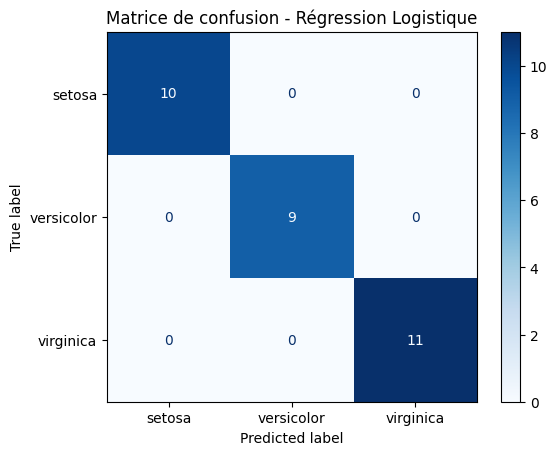

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Régression Logistique")
plt.show()

#visualisation des coefficients Ridge vs Lasso

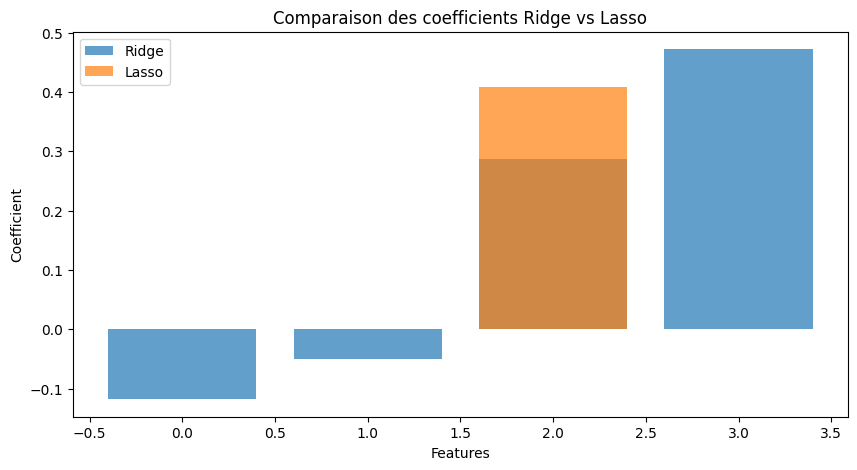

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(len(ridge.coef_)), ridge.coef_, alpha=0.7, label="Ridge")
plt.bar(range(len(lasso.coef_)), lasso.coef_, alpha=0.7, label="Lasso")
plt.legend()
plt.title("Comparaison des coefficients Ridge vs Lasso")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.show()

Notre manipulation couvre bien les 3 piliers :

* Entraîner → .fit()
* Évaluer → R², MSE, Accuracy
* Visualisation → scatter, matrice de confusion, coefficients Ridge/Lasso